# PiML Toolbox: High-code Demo for TaiwanCredit Data

This example notebook demonstrates how to use PiML with its high-code APIs for the TaiwanCredit data from UCI repository, which consists of 30,000 credit card clients in Taiwan from 200504 to 200509; see details [here](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients). The data can be loaded from PiML and it is subject to slight preprocessing. 

The response `FlagDefault` is binary and it is a classification problem.

# Stage 0: Install PiML package on Google Colab

1. Run `!pip install piml` to install the latest version of PiML. It requires V0.2 or above to use high-code APIs.
2. In Colab, you'll need restart the runtime in order to use newly installed PiML version.

In [ ]:
!pip install piml

In [ ]:
!pip install statsmodels -U # install version>=0.13 to get more stable curve fit in some plots

# Stage 1: Initialize an experiment, Load and Prepare data

In [3]:
from piml import Experiment
exp = Experiment()

In [4]:
exp.data_loader(data='TaiwanCredit')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,FlagDefault
0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,0.0,...,0.000000,0.000000,0.000000,0.000000,2.838849,0.000000,0.000000,0.000000,0.000000,1.0
1,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3.514946,3.538574,3.513484,0.000000,3.000434,3.000434,3.000434,0.000000,3.301247,1.0
2,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,4.156307,4.174612,4.191730,3.181558,3.176381,3.000434,3.000434,3.000434,3.699057,0.0
3,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,4.452017,4.461799,4.470528,3.301247,3.305351,3.079543,3.041787,3.029384,3.000434,0.0
4,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,4.320997,4.282101,4.281760,3.301247,4.564453,4.000043,3.954291,2.838849,2.832509,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,4.944508,4.494683,4.203604,3.929470,4.301052,3.699317,3.484015,3.699057,3.000434,0.0
29996,150000.0,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,3.953276,3.715251,0.000000,3.264345,3.547405,3.954194,2.113943,0.000000,0.000000,0.0
29997,30000.0,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,4.319710,4.313509,4.286860,0.000000,0.000000,4.342443,3.623353,3.301247,3.491502,1.0
29998,80000.0,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,0.0,...,4.722428,4.073938,4.689708,4.933998,3.532754,3.071514,3.284882,4.723989,3.256477,1.0


In [5]:
# Use only payment history attributes: Pay_1~6, BILL_AMT1~6 and PAY_AMT1~6 (i.e., exclude all others); Keep the response `FlagDefault`
exp.data_summary(feature_exclude=["LIMIT_BAL", "SEX", "EDUCATION", "MARRIAGE", "AGE"], feature_type={})

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value='Data Shape:(30000, 24)')

In [6]:
exp.data_prepare(target='FlagDefault', task_type='Classification', test_ratio=0.2, random_state=0)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

,0,1
0,Excluded columns,"[LIMIT_BAL, SEX, EDUCATION, MARRIAGE, AGE]"
1,Target colunm,FlagDefault
2,Sample weight,None
3,Task type,Classification
4,Test ratio,0.2
5,Random state,0


HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

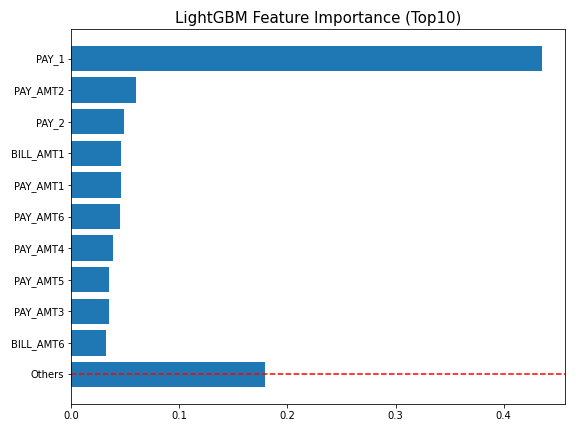

In [7]:
exp.feature_select(threshold=0.9)

In [8]:
exp.eda(show='all', uni_feature='BILL_AMT1', bi_features=['PAY_1', 'PAY_AMT1'],  multi_type='correlation_heatmap')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

# Stage 2. Train intepretable models 

In [9]:
## ReLU-DNN: ReLU Deep Neural Networks with L1-Regularization, e.g. L1_reg = 0.0008
from piml.models import ReluDNNClassifier

clf1 = ReluDNNClassifier(hidden_layer_sizes=(40, 40), l1_reg=0.0008,
                        batch_size=500, learning_rate=0.001)
exp.model_train(model=clf1, name='ReLU-DNN')
exp.model_diagnose(model="ReLU-DNN", show='accuracy_result')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value="<p class='notification info'>Register ReLU-DNN Done</p>")

,,ACC,AUC,Recall,Precision,F1
0,Train,0.818208,0.758818,0.360742,0.669680,0.468898
1,Test,0.829833,0.763724,0.371627,0.700581,0.485642
2,Gap,0.011625,0.004906,0.010885,0.030901,0.016744


In [10]:
## GAMI-Net: GAM-Neural Networks with Structured Interactions
from piml.models import GAMINetClassifier

clf2 = GAMINetClassifier(interact_num=10, loss_threshold=0.01,  
                        subnet_size_main_effect=[20], 
                        subnet_size_interaction=[20,20])
exp.model_train(model=clf2, name='GAMI-Net')
exp.model_diagnose(model="GAMI-Net", show='accuracy_result')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value="<p class='notification info'>Register GAMI-Net Done</p>")

,,ACC,AUC,Recall,Precision,F1
0,Train,0.818667,0.769358,0.354561,0.676313,0.465225
1,Test,0.828667,0.763728,0.367001,0.696925,0.480808
2,Gap,0.010000,-0.005631,0.012440,0.020612,0.015583


In [11]:
## EBM: Explainable Boosting Machine from MS Research
from piml.models import ExplainableBoostingClassifier

clf3 = ExplainableBoostingClassifier(interactions=10, random_state=0)
exp.model_train(model=clf3, name='EBM')
exp.model_diagnose(model="EBM", show='accuracy_result')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value="<p class='notification info'>Register EBM Done</p>")

,,ACC,AUC,Recall,Precision,F1
0,Train,0.820792,0.783755,0.351002,0.691513,0.465648
1,Test,0.829500,0.771570,0.360833,0.706949,0.477795
2,Gap,0.008708,-0.012185,0.009831,0.015436,0.012147


In [12]:
exp.model_compare(models=['ReLU-DNN', 'GAMI-Net', 'EBM'], show='accuracy')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

# Stage 3. Explain and Interpret

## Post-hoc Explaination: Global and Local Methods

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

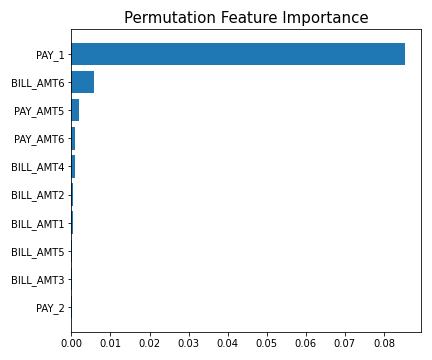

In [13]:
exp.model_explain(model='ReLU-DNN', show='global_pfi', figsize=(6,5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

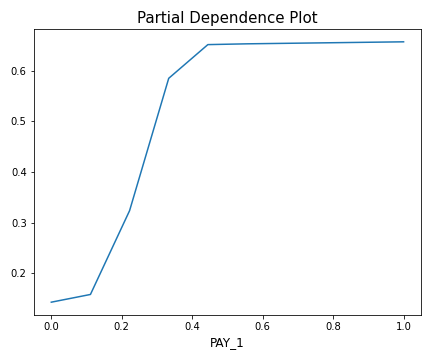

In [14]:
exp.model_explain(model='ReLU-DNN', show='global_pdp', uni_feature='PAY_1', figsize=(6,5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

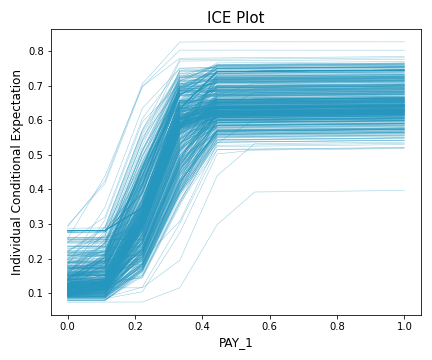

In [15]:
exp.model_explain(model='ReLU-DNN', show='global_ice', uni_feature="PAY_1", figsize=(6,5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

Exact explainer: 51it [00:44,  1.04s/it]


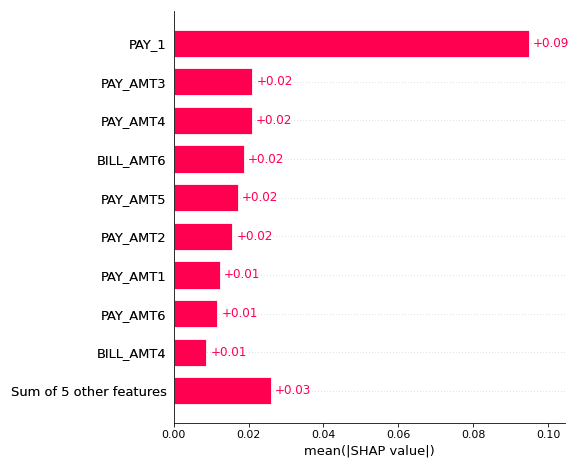

In [18]:
exp.model_explain(model='ReLU-DNN', show='global_shap_fi', sample_size=50)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

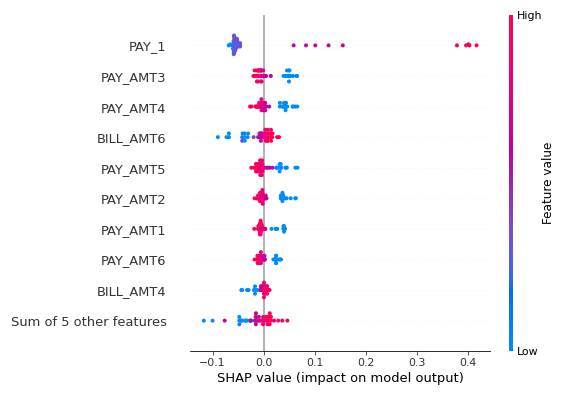

In [19]:
exp.model_explain(model='ReLU-DNN', show='global_shap_summary', 
                  sample_size=50)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

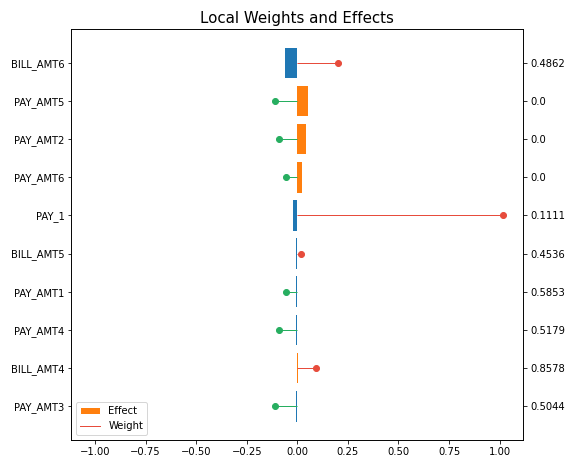

In [20]:
exp.model_explain(model='ReLU-DNN', show='local_lime', sample_id=0)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

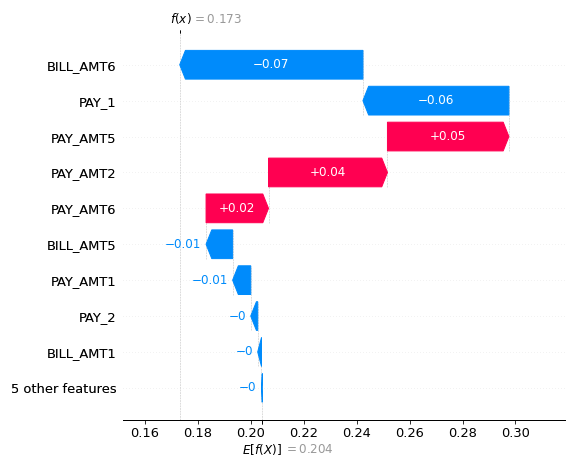

In [21]:
exp.model_explain(model='ReLU-DNN', show='local_shap', sample_id=0)

## Inherent Interpretation: Global and Local Methods

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

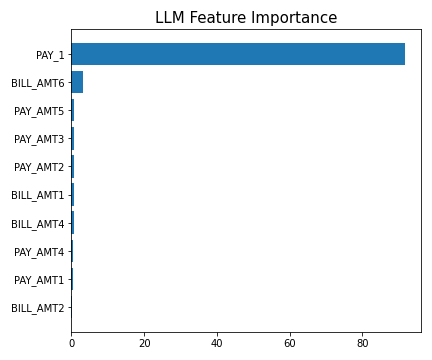

In [22]:
exp.model_interpret(model='ReLU-DNN', show='global_fi', figsize=(6,5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

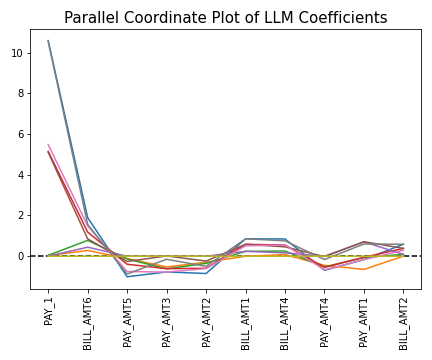

In [23]:
exp.model_interpret(model='ReLU-DNN', show='llm_pc', figsize=(6,5))

In [24]:
exp.model_interpret(model='ReLU-DNN', show='llm_summary', figsize=(6,5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

,Count,Response Mean,Response Std,Local AUC,Global AUC
0,11804.0,0.217892,0.412831,0.735950,0.720012
1,10383.0,0.142733,0.349818,0.642880,0.669706
2,817.0,0.722154,0.448211,0.534824,0.682976
3,812.0,0.699507,0.458755,0.517007,0.721820
4,132.0,0.727273,0.447058,0.354601,0.419939
5,27.0,0.666667,0.480384,0.740741,0.645445
6,11.0,0.727273,0.467099,0.375000,0.730229
7,9.0,0.333333,0.500000,0.666667,0.683309
8,5.0,0.400000,0.547723,0.833333,0.477316


HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

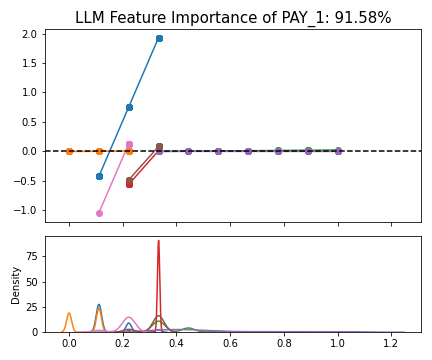

In [25]:
exp.model_interpret(model='ReLU-DNN', show='global_effect_plot', uni_feature='PAY_1', figsize=(6,5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

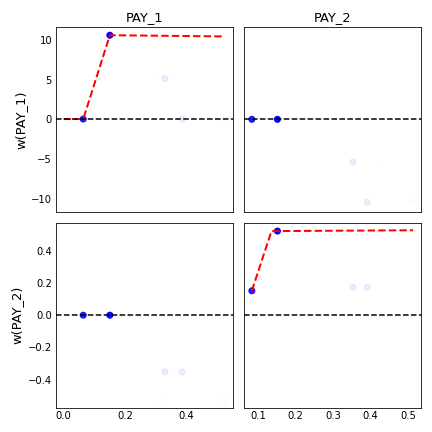

In [27]:
exp.model_interpret(model='ReLU-DNN', show='global_effect_plot', 
                    bi_features=['PAY_1', 'PAY_2'], figsize=(6,6))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

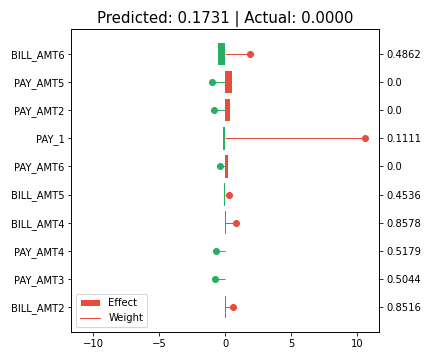

In [28]:
exp.model_interpret(model='ReLU-DNN', show='local_fi', sample_id=0, figsize=(6,5))

# Stage 4. Diagnose and Compare

In [29]:
exp.model_diagnose(model='ReLU-DNN', show='accuracy_result')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

,,ACC,AUC,Recall,Precision,F1
0,Train,0.818208,0.758818,0.360742,0.669680,0.468898
1,Test,0.829833,0.763724,0.371627,0.700581,0.485642
2,Gap,0.011625,0.004906,0.010885,0.030901,0.016744


HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

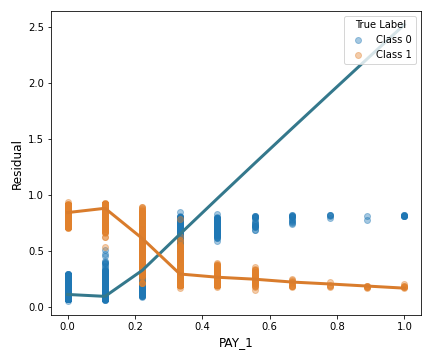

In [30]:
exp.model_diagnose(model='ReLU-DNN', show='accuracy_residual', target_feature='PAY_1', figsize=(6, 5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

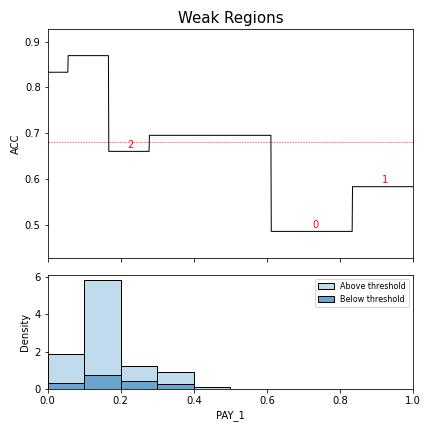

In [31]:
exp.model_diagnose(model='ReLU-DNN', show='weakspot_plot', slice_features=['PAY_1'], 
                   slice_method='tree', threshold=1.2, min_sample=20, figsize=(6, 6))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

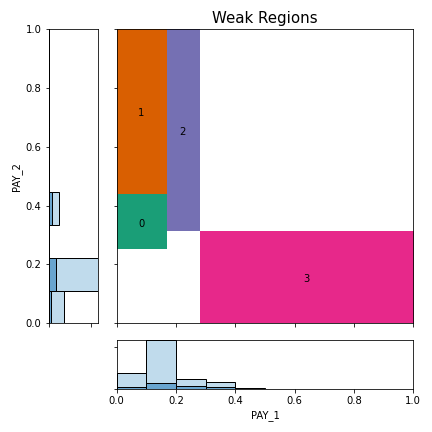

In [32]:
exp.model_diagnose(model='ReLU-DNN', show='weakspot_plot', slice_features=['PAY_1', 'PAY_2'], 
                   slice_method='tree', threshold=1.2, min_sample=20, figsize=(6, 6))

In [33]:
exp.model_diagnose(model='ReLU-DNN', show='weakspot_result', slice_features=['PAY_1', 'PAY_2'], 
                   slice_method='tree', threshold=1.2, min_sample=20)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

Weak Regions cut-off at ACC: 0.68184


,[PAY_1,PAY_1),[PAY_2,PAY_2),#Test,#Train,test_ACC,train_ACC,Gap
0,0.000000,0.166667,0.2500,0.4375,66,326,0.712121,0.628834,0.083287
1,0.000000,0.166667,0.4375,1.0000,16,39,0.500000,0.435897,0.064103
2,0.166667,0.277778,0.3125,1.0000,359,1463,0.623955,0.578947,0.045008
3,0.277778,1.000000,0.0000,0.3125,191,800,0.691099,0.655000,0.036099


In [34]:
exp.model_diagnose(model='ReLU-DNN', show='underfit_plot', slice_features=['PAY_1'], 
                   slice_method='tree', threshold=1.15, min_sample=10, figsize=(6, 6))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

In [35]:
exp.model_diagnose(model='ReLU-DNN', show='robustness', perturb_features='All Features', 
                   step=0.01, alpha=0.2, figsize=(6,5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [36]:
exp.model_diagnose(model='ReLU-DNN', show='resilience', immu_feature='None', 
                   target_feature='PAY_1', alpha=0.1)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

Box(children=(HBox(children=(Box(children=(VBox(children=(Output(), Output())),), layout=Layout(width='36%')),…

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

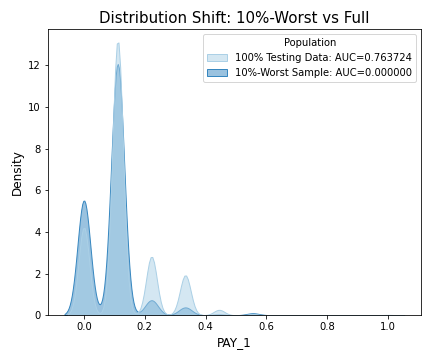

In [37]:
exp.model_diagnose(model='ReLU-DNN', show='resilience_shift_density', immu_feature='None', 
                   target_feature='PAY_1', alpha=0.1, figsize=(6,5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

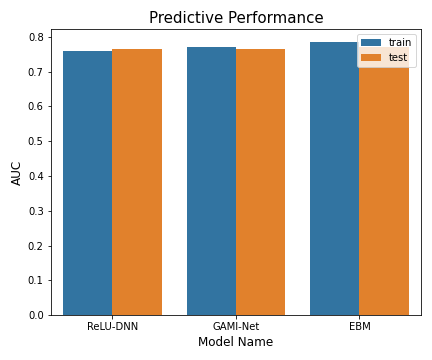

In [38]:
exp.model_compare(models=['ReLU-DNN', 'GAMI-Net', 'EBM'], show='accuracy_auc', figsize=(6,5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

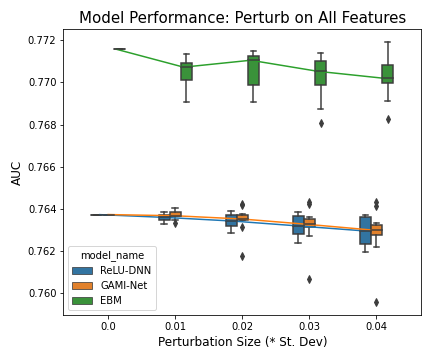

In [39]:
exp.model_compare(models=['ReLU-DNN', 'GAMI-Net', 'EBM'], show='robustness_perf', 
                  step=0.01, figsize=(6,5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

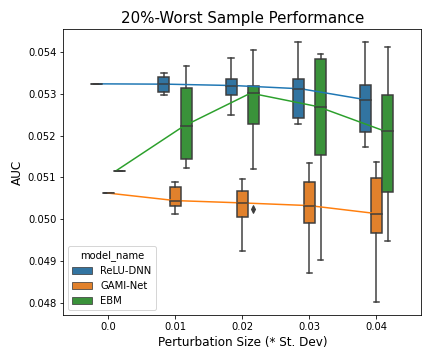

In [40]:
exp.model_compare(models=['ReLU-DNN', 'GAMI-Net', 'EBM'], show='robustness_perf_worst', 
                  step=0.01, alpha=0.2, figsize=(6,5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

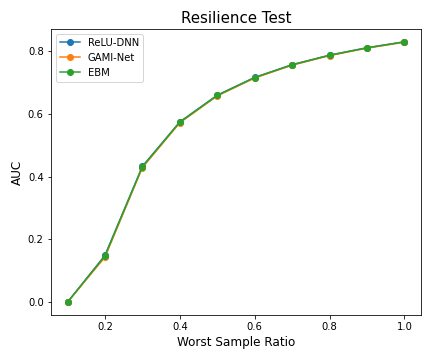

In [41]:
exp.model_compare(models=['ReLU-DNN', 'GAMI-Net', 'EBM'], show='resilience_perf', 
                   immu_feature='None', figsize=(6,5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

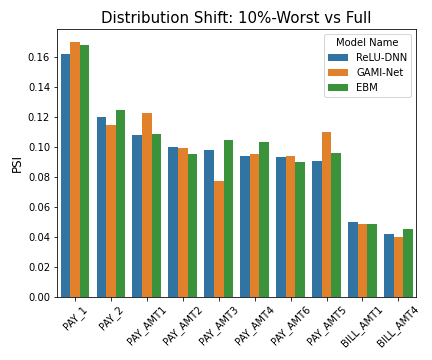

In [42]:
exp.model_compare(models=['ReLU-DNN', 'GAMI-Net', 'EBM'], show='resilience_psi', 
                   immu_feature='None', figsize=(6,5))

#Stage 5. Register an arbitrary model ... 

In [43]:
from lightgbm import LGBMClassifier

clf = LGBMClassifier(max_depth=7, n_estimators=500)
pipeline = exp.make_pipeline(model=clf)
pipeline.fit()
exp.register(pipeline=pipeline, name='LightGBM')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value="<p class='notification info'>Register LightGBM Done</p>")

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

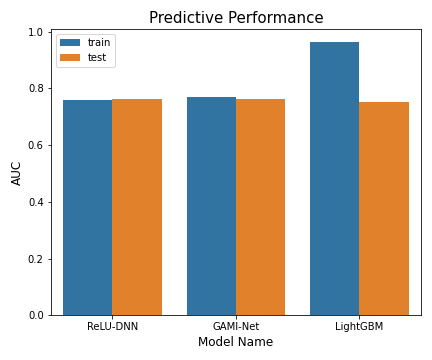

In [44]:
exp.model_compare(models=['ReLU-DNN', 'GAMI-Net', 'LightGBM'], show='accuracy_auc', figsize=(6,5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

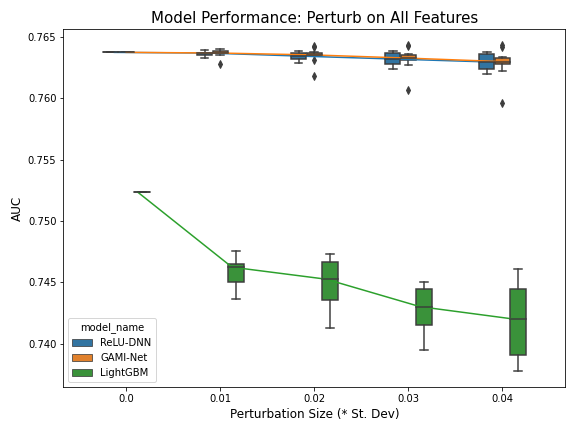

In [45]:
exp.model_compare(models=['ReLU-DNN', 'GAMI-Net', 'LightGBM'], show='robustness_perf', 
                  perturb_features='All Features', step=0.01, figsize=(8,6))